# 📡 Data Loader - Exemplos Práticos

## 🚀 Importações e Setup Inicial

In [2]:
import loczcit_iqr as lz
from datetime import datetime
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

# Configurar logging para ver mais detalhes
import logging
logging.basicConfig(level=logging.INFO)

✅ 18 fontes da biblioteca loczcit_iqr registradas com sucesso.
🎨 Estilo tipográfico profissional loczcit_iqr aplicado.
🌊 LOCZCIT-IQR v0.0.1 carregada!
   📖 Use lz.quick_start_guide() para começar
   🔧 Use lz.check_modules() para verificar módulos


In [3]:
lz.check_modules()

🌊 LOCZCIT-IQR - Status dos Módulos

📦 CORE:
   ✅ data_loader
   ✅ processor
   ✅ iqr_detector
   ✅ spline_interpolator
   ✅ climatologia
   ✅ Status core: Completo

📦 PLOTTING:
   ✅ visualizer
   ✅ style
   ✅ Status plotting: Completo

📦 UTILS:
   ✅ pentadas
   ✅ validators
   ✅ Status utils: Completo

💡 RECOMENDAÇÕES:
   🎉 Todos os módulos estão funcionando perfeitamente!

📚 Para começar, use: lz.quick_start_guide()


{'core': {'data_loader': True,
  'processor': True,
  'iqr_detector': True,
  'spline_interpolator': True,
  'climatologia': True,
  'all_available': True},
 'plotting': {'visualizer': True, 'style': True, 'all_available': True},
 'utils': {'pentadas': True, 'validators': True, 'all_available': True}}

## 🌟 Exemplo 1: Verificação de Conectividade e Status do Servidor

In [4]:
# Criar instância do loader
loader = lz.NOAADataLoader(cache_dir='./data_cache')

# 🌐 VERIFICAR CONECTIVIDADE PRIMEIRO
print("🔍 Verificando conectividade com servidor NOAA...")
conectividade = loader._check_connectivity()
print(f"   Status: {'✅ Conectado' if conectividade else '❌ Sem conexão'}")

# 📊 STATUS COMPLETO DO SERVIDOR
print("\n📊 Status detalhado do servidor:")
status = loader.get_server_status()
print(f"   🌐 URL: {status['server_url']}")
print(f"   🔗 Conectividade: {'✅' if status['connectivity'] else '❌'}")
print(f"   ⏱️ Tempo de resposta: {status['response_time_ms']} ms")
print(f"   📁 Arquivos disponíveis: {status['available_files']}")

if 'available_years' in status:
    print(f"   📅 Anos disponíveis: {status['available_years']}")

🔍 Verificando conectividade com servidor NOAA...
   Status: ✅ Conectado

📊 Status detalhado do servidor:
   🌐 URL: https://www.ncei.noaa.gov/data/outgoing-longwave-radiation-daily/access
   🔗 Conectividade: ✅
   ⏱️ Tempo de resposta: 2911 ms
   📁 Arquivos disponíveis: 47
   📅 Anos disponíveis: [1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [5]:
# Baixar dados de um ano específico em loop
anos = [ano for ano in range(1979, 2025 + 1)]

for ano in anos:
    print(f"\n📥 Baixando dados para o ano {ano}...")
    try:
        loader.download_year_data(year=ano, show_progress=True)
        print(f"   ✅ Dados do ano {ano} baixados com sucesso!")
    except Exception as e:
        print(f"   ❌ Erro ao baixar dados do ano {ano}: {e}")


📥 Baixando dados para o ano 1979...


2025-10-06 16:38:18,673 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19790101_19791231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19790101_19791231.nc
2025-10-06 16:38:20,766 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19790101_19791231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19790101_19791231.nc
olr-daily_v01r02_19790101_19791231.nc: 100%|██████████| 94.6M/94.6M [00:19<00:00, 4.90MB/s]
2025-10-06 16:38:42,213 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19790101_19791231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19790101_19791231.nc


   ✅ Dados do ano 1979 baixados com sucesso!

📥 Baixando dados para o ano 1980...


2025-10-06 16:38:45,149 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19800101_19801231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19800101_19801231.nc
2025-10-06 16:38:45,971 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19800101_19801231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19800101_19801231.nc
olr-daily_v01r02_19800101_19801231.nc: 100%|██████████| 94.9M/94.9M [00:20<00:00, 4.71MB/s]
2025-10-06 16:39:07,297 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19800101_19801231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19800101_19801231.nc


   ✅ Dados do ano 1980 baixados com sucesso!

📥 Baixando dados para o ano 1981...


2025-10-06 16:39:09,436 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19810101_19811231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19810101_19811231.nc
2025-10-06 16:39:10,199 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19810101_19811231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19810101_19811231.nc
olr-daily_v01r02_19810101_19811231.nc: 100%|██████████| 94.6M/94.6M [00:17<00:00, 5.57MB/s]
2025-10-06 16:39:28,281 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19810101_19811231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19810101_19811231.nc


   ✅ Dados do ano 1981 baixados com sucesso!

📥 Baixando dados para o ano 1982...


2025-10-06 16:39:30,363 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19820101_19821231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19820101_19821231.nc
2025-10-06 16:39:31,125 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19820101_19821231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19820101_19821231.nc
olr-daily_v01r02_19820101_19821231.nc: 100%|██████████| 94.6M/94.6M [00:15<00:00, 6.02MB/s]
2025-10-06 16:39:47,929 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19820101_19821231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19820101_19821231.nc


   ✅ Dados do ano 1982 baixados com sucesso!

📥 Baixando dados para o ano 1983...


2025-10-06 16:39:49,982 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19830101_19831231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19830101_19831231.nc
2025-10-06 16:39:50,793 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19830101_19831231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19830101_19831231.nc
olr-daily_v01r02_19830101_19831231.nc: 100%|██████████| 94.6M/94.6M [00:21<00:00, 4.45MB/s]
2025-10-06 16:40:13,125 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19830101_19831231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19830101_19831231.nc


   ✅ Dados do ano 1983 baixados com sucesso!

📥 Baixando dados para o ano 1984...


2025-10-06 16:40:15,305 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19840101_19841231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19840101_19841231.nc
2025-10-06 16:40:16,102 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19840101_19841231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19840101_19841231.nc
olr-daily_v01r02_19840101_19841231.nc: 100%|██████████| 94.9M/94.9M [00:22<00:00, 4.23MB/s]
2025-10-06 16:40:39,689 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19840101_19841231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19840101_19841231.nc


   ✅ Dados do ano 1984 baixados com sucesso!

📥 Baixando dados para o ano 1985...


2025-10-06 16:40:43,598 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19850101_19851231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19850101_19851231.nc
2025-10-06 16:40:45,455 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19850101_19851231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19850101_19851231.nc
olr-daily_v01r02_19850101_19851231.nc: 100%|██████████| 94.6M/94.6M [00:21<00:00, 4.42MB/s]
2025-10-06 16:41:08,542 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19850101_19851231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19850101_19851231.nc


   ✅ Dados do ano 1985 baixados com sucesso!

📥 Baixando dados para o ano 1986...


2025-10-06 16:41:16,251 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19860101_19861231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19860101_19861231.nc
2025-10-06 16:41:20,330 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19860101_19861231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19860101_19861231.nc
olr-daily_v01r02_19860101_19861231.nc: 100%|██████████| 94.6M/94.6M [00:20<00:00, 4.67MB/s]
2025-10-06 16:41:45,338 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19860101_19861231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19860101_19861231.nc


   ✅ Dados do ano 1986 baixados com sucesso!

📥 Baixando dados para o ano 1987...


2025-10-06 16:41:52,349 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19870101_19871231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19870101_19871231.nc
2025-10-06 16:41:54,653 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19870101_19871231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19870101_19871231.nc
olr-daily_v01r02_19870101_19871231.nc: 100%|██████████| 94.6M/94.6M [00:19<00:00, 4.81MB/s]
2025-10-06 16:42:16,524 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19870101_19871231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19870101_19871231.nc


   ✅ Dados do ano 1987 baixados com sucesso!

📥 Baixando dados para o ano 1988...


2025-10-06 16:42:18,629 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19880101_19881231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19880101_19881231.nc
2025-10-06 16:42:19,396 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19880101_19881231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19880101_19881231.nc
olr-daily_v01r02_19880101_19881231.nc: 100%|██████████| 94.9M/94.9M [00:16<00:00, 5.76MB/s]
2025-10-06 16:42:36,971 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19880101_19881231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19880101_19881231.nc


   ✅ Dados do ano 1988 baixados com sucesso!

📥 Baixando dados para o ano 1989...


2025-10-06 16:42:39,150 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19890101_19891231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19890101_19891231.nc
2025-10-06 16:42:39,992 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19890101_19891231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19890101_19891231.nc
olr-daily_v01r02_19890101_19891231.nc: 100%|██████████| 94.6M/94.6M [00:15<00:00, 5.97MB/s]
2025-10-06 16:42:56,946 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19890101_19891231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19890101_19891231.nc


   ✅ Dados do ano 1989 baixados com sucesso!

📥 Baixando dados para o ano 1990...


2025-10-06 16:42:59,084 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19900101_19901231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19900101_19901231.nc
2025-10-06 16:42:59,870 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19900101_19901231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19900101_19901231.nc
olr-daily_v01r02_19900101_19901231.nc: 100%|██████████| 94.6M/94.6M [00:14<00:00, 6.64MB/s]
2025-10-06 16:43:15,263 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19900101_19901231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19900101_19901231.nc


   ✅ Dados do ano 1990 baixados com sucesso!

📥 Baixando dados para o ano 1991...


2025-10-06 16:43:17,366 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19910101_19911231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19910101_19911231.nc
2025-10-06 16:43:18,188 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19910101_19911231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19910101_19911231.nc
olr-daily_v01r02_19910101_19911231.nc: 100%|██████████| 94.6M/94.6M [00:17<00:00, 5.51MB/s]
2025-10-06 16:43:36,453 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19910101_19911231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19910101_19911231.nc


   ✅ Dados do ano 1991 baixados com sucesso!

📥 Baixando dados para o ano 1992...


2025-10-06 16:43:38,612 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19920101_19921231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19920101_19921231.nc
2025-10-06 16:43:39,418 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19920101_19921231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19920101_19921231.nc
olr-daily_v01r02_19920101_19921231.nc: 100%|██████████| 94.9M/94.9M [00:18<00:00, 5.27MB/s]
2025-10-06 16:43:58,586 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19920101_19921231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19920101_19921231.nc


   ✅ Dados do ano 1992 baixados com sucesso!

📥 Baixando dados para o ano 1993...


2025-10-06 16:44:00,815 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19930101_19931231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19930101_19931231.nc
2025-10-06 16:44:01,606 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19930101_19931231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19930101_19931231.nc
olr-daily_v01r02_19930101_19931231.nc: 100%|██████████| 94.6M/94.6M [00:16<00:00, 5.64MB/s]
2025-10-06 16:44:19,428 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19930101_19931231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19930101_19931231.nc


   ✅ Dados do ano 1993 baixados com sucesso!

📥 Baixando dados para o ano 1994...


2025-10-06 16:44:29,488 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19940101_19941231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19940101_19941231.nc
2025-10-06 16:44:34,381 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19940101_19941231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19940101_19941231.nc
olr-daily_v01r02_19940101_19941231.nc: 100%|██████████| 94.6M/94.6M [00:18<00:00, 5.09MB/s]
2025-10-06 16:44:58,219 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19940101_19941231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19940101_19941231.nc


   ✅ Dados do ano 1994 baixados com sucesso!

📥 Baixando dados para o ano 1995...


2025-10-06 16:45:02,833 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19950101_19951231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19950101_19951231.nc
2025-10-06 16:45:03,858 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19950101_19951231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19950101_19951231.nc
olr-daily_v01r02_19950101_19951231.nc: 100%|██████████| 94.6M/94.6M [00:16<00:00, 5.82MB/s]
2025-10-06 16:45:21,154 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19950101_19951231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19950101_19951231.nc


   ✅ Dados do ano 1995 baixados com sucesso!

📥 Baixando dados para o ano 1996...


2025-10-06 16:45:24,352 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19960101_19961231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19960101_19961231.nc
2025-10-06 16:45:25,860 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19960101_19961231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19960101_19961231.nc
olr-daily_v01r02_19960101_19961231.nc: 100%|██████████| 94.9M/94.9M [00:18<00:00, 5.16MB/s]
2025-10-06 16:45:45,622 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19960101_19961231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19960101_19961231.nc


   ✅ Dados do ano 1996 baixados com sucesso!

📥 Baixando dados para o ano 1997...


2025-10-06 16:45:54,461 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19970101_19971231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19970101_19971231.nc
2025-10-06 16:45:59,320 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19970101_19971231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19970101_19971231.nc
olr-daily_v01r02_19970101_19971231.nc: 100%|██████████| 94.6M/94.6M [00:12<00:00, 7.48MB/s]
2025-10-06 16:46:17,143 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19970101_19971231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19970101_19971231.nc


   ✅ Dados do ano 1997 baixados com sucesso!

📥 Baixando dados para o ano 1998...


2025-10-06 16:46:22,694 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19980101_19981231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19980101_19981231.nc
2025-10-06 16:46:23,814 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19980101_19981231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19980101_19981231.nc
olr-daily_v01r02_19980101_19981231.nc: 100%|██████████| 94.6M/94.6M [00:12<00:00, 7.87MB/s]
2025-10-06 16:46:36,898 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19980101_19981231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19980101_19981231.nc


   ✅ Dados do ano 1998 baixados com sucesso!

📥 Baixando dados para o ano 1999...


2025-10-06 16:46:39,131 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_19990101_19991231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_19990101_19991231.nc
2025-10-06 16:46:39,914 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_19990101_19991231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_19990101_19991231.nc
olr-daily_v01r02_19990101_19991231.nc: 100%|██████████| 94.6M/94.6M [00:11<00:00, 7.97MB/s]
2025-10-06 16:46:52,823 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_19990101_19991231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_19990101_19991231.nc


   ✅ Dados do ano 1999 baixados com sucesso!

📥 Baixando dados para o ano 2000...


2025-10-06 16:46:54,894 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20000101_20001231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20000101_20001231.nc
2025-10-06 16:46:58,641 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20000101_20001231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20000101_20001231.nc
olr-daily_v01r02_20000101_20001231.nc: 100%|██████████| 94.9M/94.9M [00:11<00:00, 8.32MB/s]
2025-10-06 16:47:14,709 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20000101_20001231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20000101_20001231.nc


   ✅ Dados do ano 2000 baixados com sucesso!

📥 Baixando dados para o ano 2001...


2025-10-06 16:47:20,768 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20010101_20011231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20010101_20011231.nc
2025-10-06 16:47:23,421 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20010101_20011231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20010101_20011231.nc
olr-daily_v01r02_20010101_20011231.nc: 100%|██████████| 94.6M/94.6M [00:13<00:00, 6.99MB/s]
2025-10-06 16:47:40,483 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20010101_20011231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20010101_20011231.nc


   ✅ Dados do ano 2001 baixados com sucesso!

📥 Baixando dados para o ano 2002...


2025-10-06 16:47:42,626 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20020101_20021231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20020101_20021231.nc
2025-10-06 16:47:43,416 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20020101_20021231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20020101_20021231.nc
olr-daily_v01r02_20020101_20021231.nc: 100%|██████████| 94.6M/94.6M [00:17<00:00, 5.29MB/s]
2025-10-06 16:48:02,630 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20020101_20021231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20020101_20021231.nc


   ✅ Dados do ano 2002 baixados com sucesso!

📥 Baixando dados para o ano 2003...


2025-10-06 16:48:11,287 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20030101_20031231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20030101_20031231.nc
2025-10-06 16:48:12,917 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20030101_20031231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20030101_20031231.nc
olr-daily_v01r02_20030101_20031231.nc: 100%|██████████| 94.6M/94.6M [00:17<00:00, 5.56MB/s]
2025-10-06 16:48:31,746 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20030101_20031231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20030101_20031231.nc


   ✅ Dados do ano 2003 baixados com sucesso!

📥 Baixando dados para o ano 2004...


2025-10-06 16:48:41,614 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20040101_20041231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20040101_20041231.nc
2025-10-06 16:48:44,519 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20040101_20041231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20040101_20041231.nc
olr-daily_v01r02_20040101_20041231.nc: 100%|██████████| 94.9M/94.9M [00:15<00:00, 6.23MB/s]
2025-10-06 16:49:02,884 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20040101_20041231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20040101_20041231.nc


   ✅ Dados do ano 2004 baixados com sucesso!

📥 Baixando dados para o ano 2005...


2025-10-06 16:49:09,647 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20050101_20051231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20050101_20051231.nc
2025-10-06 16:49:10,423 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20050101_20051231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20050101_20051231.nc
olr-daily_v01r02_20050101_20051231.nc: 100%|██████████| 94.6M/94.6M [00:13<00:00, 7.02MB/s]
2025-10-06 16:49:25,093 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20050101_20051231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20050101_20051231.nc


   ✅ Dados do ano 2005 baixados com sucesso!

📥 Baixando dados para o ano 2006...


2025-10-06 16:49:27,416 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20060101_20061231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20060101_20061231.nc
2025-10-06 16:49:28,195 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20060101_20061231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20060101_20061231.nc
olr-daily_v01r02_20060101_20061231.nc: 100%|██████████| 94.6M/94.6M [00:16<00:00, 5.86MB/s]
2025-10-06 16:49:45,406 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20060101_20061231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20060101_20061231.nc


   ✅ Dados do ano 2006 baixados com sucesso!

📥 Baixando dados para o ano 2007...


2025-10-06 16:49:47,458 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20070101_20071231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20070101_20071231.nc
2025-10-06 16:49:48,225 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20070101_20071231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20070101_20071231.nc
olr-daily_v01r02_20070101_20071231.nc: 100%|██████████| 94.6M/94.6M [00:15<00:00, 6.15MB/s]
2025-10-06 16:50:04,708 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20070101_20071231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20070101_20071231.nc


   ✅ Dados do ano 2007 baixados com sucesso!

📥 Baixando dados para o ano 2008...


2025-10-06 16:50:07,213 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20080101_20081231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20080101_20081231.nc
2025-10-06 16:50:08,012 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20080101_20081231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20080101_20081231.nc
olr-daily_v01r02_20080101_20081231.nc: 100%|██████████| 94.9M/94.9M [00:17<00:00, 5.55MB/s]
2025-10-06 16:50:26,352 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20080101_20081231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20080101_20081231.nc


   ✅ Dados do ano 2008 baixados com sucesso!

📥 Baixando dados para o ano 2009...


2025-10-06 16:50:33,440 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20090101_20091231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20090101_20091231.nc
2025-10-06 16:50:38,554 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20090101_20091231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20090101_20091231.nc
olr-daily_v01r02_20090101_20091231.nc: 100%|██████████| 94.6M/94.6M [00:15<00:00, 6.28MB/s]
2025-10-06 16:50:58,739 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20090101_20091231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20090101_20091231.nc


   ✅ Dados do ano 2009 baixados com sucesso!

📥 Baixando dados para o ano 2010...


2025-10-06 16:51:08,552 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20100101_20101231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20100101_20101231.nc
2025-10-06 16:51:12,410 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20100101_20101231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20100101_20101231.nc
olr-daily_v01r02_20100101_20101231.nc: 100%|██████████| 94.6M/94.6M [00:12<00:00, 7.33MB/s]
2025-10-06 16:51:27,967 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20100101_20101231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20100101_20101231.nc


   ✅ Dados do ano 2010 baixados com sucesso!

📥 Baixando dados para o ano 2011...


2025-10-06 16:51:36,957 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20110101_20111231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20110101_20111231.nc
2025-10-06 16:51:41,378 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20110101_20111231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20110101_20111231.nc
olr-daily_v01r02_20110101_20111231.nc: 100%|██████████| 94.6M/94.6M [00:12<00:00, 7.31MB/s]
2025-10-06 16:51:58,572 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20110101_20111231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20110101_20111231.nc


   ✅ Dados do ano 2011 baixados com sucesso!

📥 Baixando dados para o ano 2012...


2025-10-06 16:52:02,622 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20120101_20121231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20120101_20121231.nc
2025-10-06 16:52:04,205 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20120101_20121231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20120101_20121231.nc
olr-daily_v01r02_20120101_20121231.nc: 100%|██████████| 94.9M/94.9M [00:15<00:00, 6.19MB/s]
2025-10-06 16:52:21,650 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20120101_20121231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20120101_20121231.nc


   ✅ Dados do ano 2012 baixados com sucesso!

📥 Baixando dados para o ano 2013...


2025-10-06 16:52:23,949 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20130101_20131231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20130101_20131231.nc
2025-10-06 16:52:24,704 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20130101_20131231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20130101_20131231.nc
olr-daily_v01r02_20130101_20131231.nc: 100%|██████████| 94.6M/94.6M [00:12<00:00, 7.56MB/s]
2025-10-06 16:52:38,479 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20130101_20131231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20130101_20131231.nc


   ✅ Dados do ano 2013 baixados com sucesso!

📥 Baixando dados para o ano 2014...


2025-10-06 16:52:40,539 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20140101_20141231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20140101_20141231.nc
2025-10-06 16:52:41,317 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20140101_20141231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20140101_20141231.nc
olr-daily_v01r02_20140101_20141231.nc: 100%|██████████| 94.6M/94.6M [00:21<00:00, 4.45MB/s]
2025-10-06 16:53:04,131 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20140101_20141231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20140101_20141231.nc


   ✅ Dados do ano 2014 baixados com sucesso!

📥 Baixando dados para o ano 2015...


2025-10-06 16:53:06,567 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20150101_20151231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20150101_20151231.nc
2025-10-06 16:53:08,400 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20150101_20151231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20150101_20151231.nc
olr-daily_v01r02_20150101_20151231.nc: 100%|██████████| 94.6M/94.6M [00:24<00:00, 3.81MB/s]
2025-10-06 16:53:36,631 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20150101_20151231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20150101_20151231.nc


   ✅ Dados do ano 2015 baixados com sucesso!

📥 Baixando dados para o ano 2016...


2025-10-06 16:53:47,062 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20160101_20161231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20160101_20161231.nc
2025-10-06 16:53:51,543 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20160101_20161231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20160101_20161231.nc
olr-daily_v01r02_20160101_20161231.nc: 100%|██████████| 94.9M/94.9M [00:20<00:00, 4.63MB/s]
2025-10-06 16:54:16,836 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20160101_20161231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20160101_20161231.nc


   ✅ Dados do ano 2016 baixados com sucesso!

📥 Baixando dados para o ano 2017...


2025-10-06 16:54:26,173 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20170101_20171231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20170101_20171231.nc
2025-10-06 16:54:31,085 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20170101_20171231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20170101_20171231.nc
olr-daily_v01r02_20170101_20171231.nc: 100%|██████████| 94.6M/94.6M [00:15<00:00, 6.21MB/s]
2025-10-06 16:54:51,288 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20170101_20171231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20170101_20171231.nc


   ✅ Dados do ano 2017 baixados com sucesso!

📥 Baixando dados para o ano 2018...


2025-10-06 16:55:00,109 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20180101_20181231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20180101_20181231.nc
2025-10-06 16:55:03,491 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20180101_20181231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20180101_20181231.nc
olr-daily_v01r02_20180101_20181231.nc: 100%|██████████| 94.6M/94.6M [00:16<00:00, 5.59MB/s]
2025-10-06 16:55:23,614 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20180101_20181231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20180101_20181231.nc


   ✅ Dados do ano 2018 baixados com sucesso!

📥 Baixando dados para o ano 2019...


2025-10-06 16:55:25,860 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20190101_20191231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20190101_20191231.nc
2025-10-06 16:55:26,756 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20190101_20191231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20190101_20191231.nc
olr-daily_v01r02_20190101_20191231.nc: 100%|██████████| 94.6M/94.6M [00:23<00:00, 4.00MB/s]
2025-10-06 16:55:51,542 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20190101_20191231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20190101_20191231.nc


   ✅ Dados do ano 2019 baixados com sucesso!

📥 Baixando dados para o ano 2020...


2025-10-06 16:55:53,905 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20200101_20201231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20200101_20201231.nc
2025-10-06 16:55:54,671 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20200101_20201231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20200101_20201231.nc
olr-daily_v01r02_20200101_20201231.nc: 100%|██████████| 94.9M/94.9M [00:12<00:00, 7.62MB/s]
2025-10-06 16:56:08,269 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20200101_20201231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20200101_20201231.nc


   ✅ Dados do ano 2020 baixados com sucesso!

📥 Baixando dados para o ano 2021...


2025-10-06 16:56:10,516 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20210101_20211231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20210101_20211231.nc
2025-10-06 16:56:11,311 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20210101_20211231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20210101_20211231.nc
olr-daily_v01r02_20210101_20211231.nc: 100%|██████████| 94.6M/94.6M [00:12<00:00, 7.34MB/s]
2025-10-06 16:56:25,363 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20210101_20211231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20210101_20211231.nc


   ✅ Dados do ano 2021 baixados com sucesso!

📥 Baixando dados para o ano 2022...


2025-10-06 16:56:31,978 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20220101_20221231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20220101_20221231.nc
2025-10-06 16:56:32,298 - loczcit_iqr.core.data_loader - INFO - Usando arquivo do cache: data_cache\olr-daily_v01r02_20220101_20221231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo do cache: data_cache\olr-daily_v01r02_20220101_20221231.nc


   ✅ Dados do ano 2022 baixados com sucesso!

📥 Baixando dados para o ano 2023...


2025-10-06 16:56:38,920 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20230101_20231231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20230101_20231231.nc
2025-10-06 16:56:39,216 - loczcit_iqr.core.data_loader - INFO - Usando arquivo do cache: data_cache\olr-daily_v01r02_20230101_20231231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo do cache: data_cache\olr-daily_v01r02_20230101_20231231.nc


   ✅ Dados do ano 2023 baixados com sucesso!

📥 Baixando dados para o ano 2024...


2025-10-06 16:56:43,470 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual preliminar: olr-daily_v01r02-preliminary_20240101_20241231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual preliminar: olr-daily_v01r02-preliminary_20240101_20241231.nc
2025-10-06 16:56:43,709 - loczcit_iqr.core.data_loader - INFO - Usando arquivo do cache: data_cache\olr-daily_v01r02-preliminary_20240101_20241231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo do cache: data_cache\olr-daily_v01r02-preliminary_20240101_20241231.nc


   ✅ Dados do ano 2024 baixados com sucesso!

📥 Baixando dados para o ano 2025...


2025-10-06 16:56:47,106 - loczcit_iqr.core.data_loader - INFO - Buscando arquivo para o ano corrente (2025)...
INFO:loczcit_iqr.core.data_loader:Buscando arquivo para o ano corrente (2025)...
2025-10-06 16:56:47,107 - loczcit_iqr.core.data_loader - INFO - Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-10-06 16:56:47,207 - loczcit_iqr.core.data_loader - INFO - Usando arquivo do cache: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo do cache: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc


   ✅ Dados do ano 2025 baixados com sucesso!


## 📥 Exemplo 2: 📊 ESTIMAR TAMANHO ANTES DO DOWNLOAD

In [5]:
# 📊 ESTIMAR TAMANHO ANTES DO DOWNLOAD
ano = '2025'
print(f"📊 Estimando tamanho do download para {ano}...")
estimate = loader.estimate_download_size(f'{ano}-01-01', f'{ano}-12-31')
print(f"   📏 Período: {estimate['period_days']} dias")
print(f"   💾 Tamanho estimado: {estimate['estimated_size_mb']} MB")
print(f"   ⏰ Tempo estimado: {estimate['estimated_download_time_readable']}")

📊 Estimando tamanho do download para 2025...
   📏 Período: 365 dias
   💾 Tamanho estimado: 182.5 MB
   ⏰ Tempo estimado: 3 minutos


## 🌍 Exemplo 3: Carregamento Básico com Validações

In [6]:
# 📡 CARREGAMENTO BÁSICO COM TODAS AS OPÇÕES
print("📡 Carregando dados com configurações completas...")

try:
    data_completa = loader.load_data(
        start_date=f'{ano}-01-01',
        end_date=f'{ano}-12-31',
        study_area=None,                # Se None, irá ser usada a área padrão utilizado no TCC
        quality_control=True,           # Aplicar controle de qualidade
        remove_leap_days=True           # Remover dias bissextos
    )
    
    print(f"✅ Dados carregados: {data_completa.dims}")
    
    # Verificar atributos adicionados
    print("\n📝 Metadados adicionados:")
    for key, value in data_completa.attrs.items():
        if key.startswith('loczcit') or key in ['source', 'leap_days_removed']:
            print(f"   {key}: {value}")
    
    # Verificar qualidade dos dados
    if 'qc_flag' in data_completa.data_vars:
        print("\n🔍 Controle de qualidade aplicado:")
        qc_unique = np.unique(data_completa.qc_flag.values[~np.isnan(data_completa.qc_flag.values)])
        for flag in qc_unique:
            count = (data_completa.qc_flag == flag).sum().item()
            meaning = {0: 'Bom', 1: 'Fora do intervalo', 2: 'Faltante'}
            print(f"   Flag {int(flag)} ({meaning.get(int(flag), 'Desconhecido')}): {count:,} pontos")

except Exception as e:
    print(f"❌ Erro no carregamento: {e}")

📡 Carregando dados com configurações completas...


2025-09-28 17:33:59,077 - loczcit_iqr.core.data_loader - INFO - Buscando arquivo para o ano corrente (2025)...
INFO:loczcit_iqr.core.data_loader:Buscando arquivo para o ano corrente (2025)...
2025-09-28 17:33:59,079 - loczcit_iqr.core.data_loader - INFO - Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-09-28 17:33:59,080 - loczcit_iqr.core.data_loader - INFO - Carregando dados de: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:Carregando dados de: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-09-28 17:33:59,368 - loczcit_iqr.core.data_loader - INFO - Dados carregados com sucesso: FrozenMappingWarningOnValuesAccess({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:Dados carregados com sucesso: FrozenMappingWarningOnValuesAcces

✅ Dados carregados: FrozenMappingWarningOnValuesAccess({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})

📝 Metadados adicionados:
   source: NOAA OLR Daily CDR
   loczcit_version: 1.0.0
   leap_days_removed: True

🔍 Controle de qualidade aplicado:
   Flag 0 (Bom): 16,200,000 pontos


<xarray.Dataset> Size: 194MB
Dimensions:      (time: 250, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * lat          (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) object 2kB 2025-01-01 12:00:00 ... 2025-09-07 12:00:00
  * lon          (lon) float32 1kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: bnds
Data variables:
    olr          (time, lat, lon) float32 65MB 188.2 188.2 188.2 ... 197.1 197.1
    lon_bounds   (lon, bnds) float32 3kB ...
    lat_bounds   (lat, bnds) float32 1kB ...
    time_bounds  (time, bnds) object 4kB ...
    qc_flag      (time, lat, lon) int64 130MB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
Attributes: (12/50)
    conventions:                CF-1.6, ACDD-1.3
    title:                      OLR-Daily CDR Product Ver01Rev02
    source:                     NOAA OLR Daily CDR
    reference:                  doi:10.1175/2007JTECHA989.1  doi:10.1175/1520...
    history:                    2025-09-09T16:01:

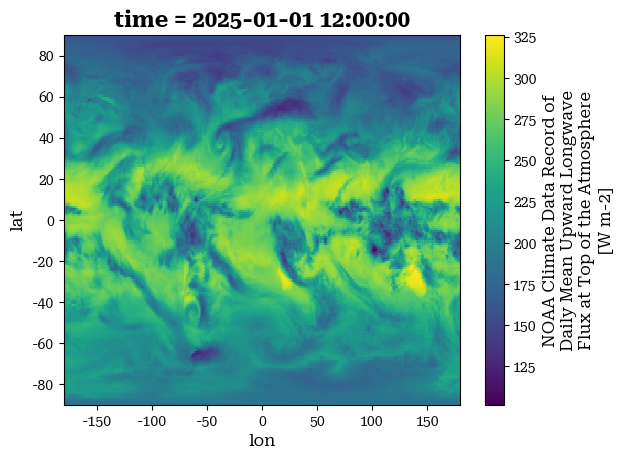

In [6]:
print(data_completa)
data_completa['olr'].sel(time=f'{ano}-01-01').plot()

## 🌊 Exemplo 4: 

### Estratégia Dupla Escala Completa

Carrega dados com estratégia dupla escala: globais + área de estudo.

ANALOGIA DO FOTÓGRAFO PROFISSIONAL 📸 

É como tirar duas fotos do mesmo evento:

Foto panorâmica (dados globais) - para contexto completo

Foto focada (study area) - para análise detalhada

2025-09-28 10:52:18,401 - loczcit_iqr.core.data_loader - INFO - 🌍 Carregando dados com estratégia dupla escala...
INFO:loczcit_iqr.core.data_loader:🌍 Carregando dados com estratégia dupla escala...
2025-09-28 10:52:18,402 - loczcit_iqr.core.data_loader - INFO - 🏪 ETAPA 0: Verificando cache local primeiro...
INFO:loczcit_iqr.core.data_loader:🏪 ETAPA 0: Verificando cache local primeiro...
2025-09-28 10:52:18,403 - loczcit_iqr.core.data_loader - INFO - 📋 Encontrados 2 arquivos em cache
INFO:loczcit_iqr.core.data_loader:📋 Encontrados 2 arquivos em cache
2025-09-28 10:52:18,404 - loczcit_iqr.core.data_loader - INFO - 🔍 Procurando arquivos do ano no cache...
INFO:loczcit_iqr.core.data_loader:🔍 Procurando arquivos do ano no cache...


🌊 Carregando com estratégia dupla escala completa...

📍 Opção 1: Geometria padrão


2025-09-28 10:52:18,731 - loczcit_iqr.core.data_loader - INFO - ✅ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20240101_20241231.nc
INFO:loczcit_iqr.core.data_loader:✅ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20240101_20241231.nc
2025-09-28 10:52:18,732 - loczcit_iqr.core.data_loader - INFO - 📡 Carregando dados globais (contexto completo)...
INFO:loczcit_iqr.core.data_loader:📡 Carregando dados globais (contexto completo)...
2025-09-28 10:52:18,872 - loczcit_iqr.core.data_loader - INFO - Removendo 1 dias 29/02
INFO:loczcit_iqr.core.data_loader:Removendo 1 dias 29/02
2025-09-28 10:52:18,958 - loczcit_iqr.core.data_loader - WARNING - Dados faltantes: 64800 (0.3%)
2025-09-28 10:52:19,077 - loczcit_iqr.core.data_loader - INFO - ✅ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:✅ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
2025-09-28 10:52:19

✅ Dados globais: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
✅ Study area: Frozen({'time': 365, 'lat': 25, 'lon': 38, 'bnds': 2})
   🌐 Dados globais: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
   🎭 Dados da área de estudo ✂️: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 25, 'lon': 38, 'bnds': 2})
<xarray.Dataset> Size: 4MB
Dimensions:      (time: 365, lat: 25, lon: 38, bnds: 2)
Coordinates:
  * lat          (lat) float32 100B -9.5 -8.5 -7.5 -6.5 ... 11.5 12.5 13.5 14.5
  * time         (time) object 3kB 2024-01-01 12:00:00 ... 2024-12-31 12:00:00
  * lon          (lon) float32 152B -47.5 -46.5 -45.5 ... -12.5 -11.5 -10.5
Dimensions without coordinates: bnds
Data variables:
    olr          (time, lat, lon) float32 1MB 214.2 209.6 203.3 ... 306.4 304.7
    lon_bounds   (lon, bnds) float32 304B ...
    lat_bounds   (lat, bnds) float32 200B ...
    time_bounds  (time, bnds) object 6kB ...
    qc_flag      (time, lat, lon) i

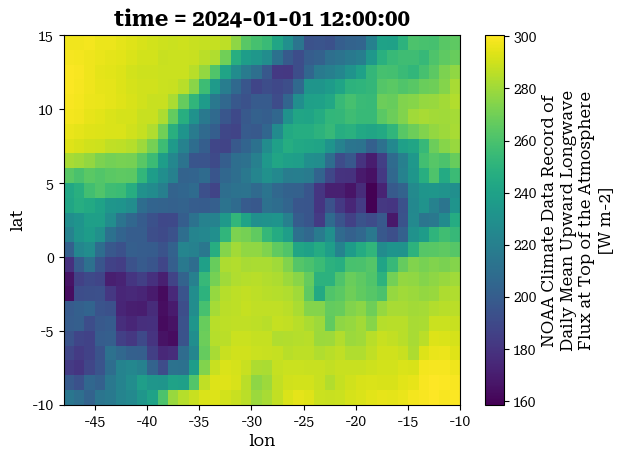

In [7]:
# 🌊 ESTRATÉGIA DUPLA ESCALA COM TODAS AS OPÇÕES
print("🌊 Carregando com estratégia dupla escala completa...")

ano = 2024

# Opção 1: Com geometria padrão utilizada no trabalho de conclusão de curso (TCC)
print("\n📍 Opção 1: Geometria padrão")
dados_globais_1, dados_area_1 = loader.load_data_dual_scale(
    start_date= f'{ano}-01-01',
    end_date= f'{ano}-12-31',
    study_area=None,  # Se None, utiliza geometria utilizada no TCC
    auto_download=True,
    quality_control=True,
    remove_leap_days=True,
    return_study_area_subset=True,
    mask_to_shape=False  # Usa BBOX padrão do TCC (sem mascaramento pela forma exata)
)

if dados_globais_1 is not None:
    print(f"   🌐 Dados globais: {dados_globais_1.dims}")
if dados_area_1 is not None:
    print(f"   🎭 Dados da área de estudo ✂️: {dados_area_1.dims}")
    print(dados_area_1)
    dados_area_1['olr'].sel(time=f'{ano}-01-01').plot()

2025-09-28 10:52:53,764 - loczcit_iqr.core.data_loader - INFO - 🌍 Carregando dados com estratégia dupla escala...
INFO:loczcit_iqr.core.data_loader:🌍 Carregando dados com estratégia dupla escala...
2025-09-28 10:52:53,765 - loczcit_iqr.core.data_loader - INFO - 🏪 ETAPA 0: Verificando cache local primeiro...
INFO:loczcit_iqr.core.data_loader:🏪 ETAPA 0: Verificando cache local primeiro...
2025-09-28 10:52:53,766 - loczcit_iqr.core.data_loader - INFO - 📋 Encontrados 2 arquivos em cache
INFO:loczcit_iqr.core.data_loader:📋 Encontrados 2 arquivos em cache
2025-09-28 10:52:53,767 - loczcit_iqr.core.data_loader - INFO - 🔍 Procurando arquivos do ano no cache...
INFO:loczcit_iqr.core.data_loader:🔍 Procurando arquivos do ano no cache...
2025-09-28 10:52:53,903 - loczcit_iqr.core.data_loader - INFO - ✅ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20240101_20241231.nc
INFO:loczcit_iqr.core.data_loader:✅ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20240101_20


🎭 Opção 2: Geometria padrão com mascaramento


2025-09-28 10:52:54,041 - loczcit_iqr.core.data_loader - INFO - Removendo 1 dias 29/02
INFO:loczcit_iqr.core.data_loader:Removendo 1 dias 29/02
2025-09-28 10:52:54,128 - loczcit_iqr.core.data_loader - WARNING - Dados faltantes: 64800 (0.3%)
2025-09-28 10:52:54,239 - loczcit_iqr.core.data_loader - INFO - ✅ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:✅ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
2025-09-28 10:52:54,240 - loczcit_iqr.core.data_loader - INFO - 🎯 Processando subset da área de estudo...
INFO:loczcit_iqr.core.data_loader:🎯 Processando subset da área de estudo...
2025-09-28 10:52:54,242 - loczcit_iqr.core.data_loader - INFO - 📍 Carregando geometria padrão de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
INFO:loczcit_iqr.core.data_loader:📍 Carregando geometria padrão de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
202

✅ Dados globais: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
✅ Study area: Frozen({'time': 365, 'lat': 25, 'lon': 38, 'bnds': 2})
🎭 Dados mascarados ✂️: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 25, 'lon': 38, 'bnds': 2})
<xarray.Dataset> Size: 10MB
Dimensions:      (time: 365, lat: 25, lon: 38, bnds: 2)
Coordinates:
  * lat          (lat) float32 100B -9.5 -8.5 -7.5 -6.5 ... 11.5 12.5 13.5 14.5
  * time         (time) object 3kB 2024-01-01 12:00:00 ... 2024-12-31 12:00:00
  * lon          (lon) float32 152B -47.5 -46.5 -45.5 ... -12.5 -11.5 -10.5
Dimensions without coordinates: bnds
Data variables:
    olr          (time, lat, lon) float32 1MB nan nan nan nan ... nan nan nan
    lon_bounds   (lon, bnds, lat) float32 8kB nan nan nan nan ... nan nan nan
    lat_bounds   (lat, bnds, lon) float32 8kB nan nan nan nan ... nan nan nan
    time_bounds  (time, bnds, lat, lon) object 6MB nan nan nan ... nan nan nan
    qc_flag      (time, lat, lon) float64 3MB nan nan

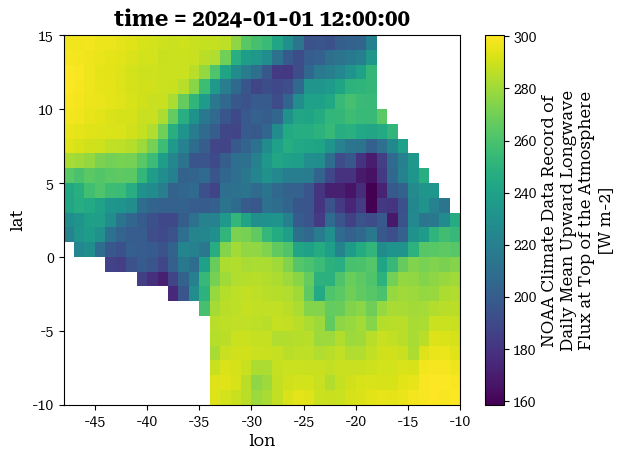

In [8]:
# Opção 2: Com mascaramento pela forma exata
print("\n🎭 Opção 2: Geometria padrão com mascaramento")
dados_globais_2, dados_area_2 = loader.load_data_dual_scale(
    start_date=f'{ano}-01-01',
    end_date=f'{ano}-12-31',
    study_area=None,  # Geometria padrão
    auto_download=True,
    quality_control=True,
    remove_leap_days=True,
    return_study_area_subset=True,
    mask_to_shape=True  # Mascaramento pela forma exata
)

if dados_area_2 is not None:
    print(f"🎭 Dados mascarados ✂️: {dados_area_2.dims}")
    print(dados_area_2)
    dados_area_2['olr'].sel(time=f'{ano}-01-01').plot()

2025-09-28 10:53:21,598 - loczcit_iqr.core.data_loader - INFO - 🌍 Carregando dados com estratégia dupla escala...
INFO:loczcit_iqr.core.data_loader:🌍 Carregando dados com estratégia dupla escala...
2025-09-28 10:53:21,599 - loczcit_iqr.core.data_loader - INFO - 🏪 ETAPA 0: Verificando cache local primeiro...
INFO:loczcit_iqr.core.data_loader:🏪 ETAPA 0: Verificando cache local primeiro...
2025-09-28 10:53:21,600 - loczcit_iqr.core.data_loader - INFO - 📋 Encontrados 2 arquivos em cache
INFO:loczcit_iqr.core.data_loader:📋 Encontrados 2 arquivos em cache
2025-09-28 10:53:21,601 - loczcit_iqr.core.data_loader - INFO - 🔍 Procurando arquivos do ano no cache...
INFO:loczcit_iqr.core.data_loader:🔍 Procurando arquivos do ano no cache...
2025-09-28 10:53:21,738 - loczcit_iqr.core.data_loader - INFO - ✅ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20240101_20241231.nc
INFO:loczcit_iqr.core.data_loader:✅ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20240101_20


✂️ Opção 3: área de estudo customizada pelo usuário


2025-09-28 10:53:21,884 - loczcit_iqr.core.data_loader - INFO - Removendo 1 dias 29/02
INFO:loczcit_iqr.core.data_loader:Removendo 1 dias 29/02
2025-09-28 10:53:21,970 - loczcit_iqr.core.data_loader - WARNING - Dados faltantes: 64800 (0.3%)
2025-09-28 10:53:22,078 - loczcit_iqr.core.data_loader - INFO - ✅ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:✅ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
2025-09-28 10:53:22,080 - loczcit_iqr.core.data_loader - INFO - 🎯 Processando subset da área de estudo...
INFO:loczcit_iqr.core.data_loader:🎯 Processando subset da área de estudo...
2025-09-28 10:53:22,080 - loczcit_iqr.core.data_loader - INFO - ✂️ Recortando dados pelo BBOX fornecido: LAT(-10.00:10.00), LON(-34.00:-15.00)
INFO:loczcit_iqr.core.data_loader:✂️ Recortando dados pelo BBOX fornecido: LAT(-10.00:10.00), LON(-34.00:-15.00)
2025-09-28 10:53:22,082 - loczcit_iqr.core.data_loade

✅ Dados globais: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
✅ Study area: Frozen({'time': 365, 'lat': 20, 'lon': 19, 'bnds': 2})
🎭 Dados da área de estudo ✂️: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 20, 'lon': 19, 'bnds': 2})
<xarray.Dataset> Size: 2MB
Dimensions:      (time: 365, lat: 20, lon: 19, bnds: 2)
Coordinates:
  * lat          (lat) float32 80B -9.5 -8.5 -7.5 -6.5 -5.5 ... 6.5 7.5 8.5 9.5
  * time         (time) object 3kB 2024-01-01 12:00:00 ... 2024-12-31 12:00:00
  * lon          (lon) float32 76B -33.5 -32.5 -31.5 -30.5 ... -17.5 -16.5 -15.5
Dimensions without coordinates: bnds
Data variables:
    olr          (time, lat, lon) float32 555kB 293.1 290.8 ... 295.4 295.6
    lon_bounds   (lon, bnds) float32 152B ...
    lat_bounds   (lat, bnds) float32 160B ...
    time_bounds  (time, bnds) object 6kB ...
    qc_flag      (time, lat, lon) int64 1MB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
Attributes: (12/46)
    conventions:                CF-1.6, AC

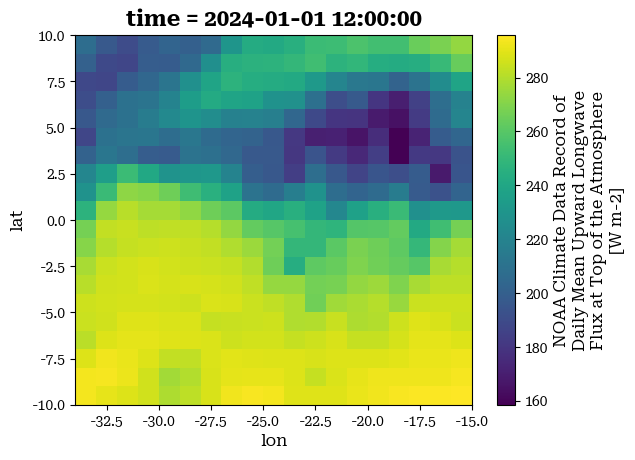

In [9]:
# Opção 3: Com BBOX customizado
print("\n✂️ Opção 3: área de estudo customizada pelo usuário")
# Exemplo de BBOX (min_lat, max_lat, min_lon, max_lon)
bbox_custom = (-10, 10, -34, -15)  # Área sobre o oceano Atlântico equatorial
dados_globais_3, dados_area_3 = loader.load_data_dual_scale(
    start_date=f'{ano}-01-01',
    end_date=f'{ano}-12-31',
    study_area=bbox_custom,
    return_study_area_subset=True
)

if dados_area_3 is not None:
    print(f"🎭 Dados da área de estudo ✂️: {dados_area_3.dims}")
    print(dados_area_3)
    dados_area_3['olr'].sel(time=f'{ano}-01-01').plot()

## 💾 Exemplo 5: Gerenciamento de Cache Avançado

In [10]:
# 📁 EXPLORAR CACHE LOCAL
print("📁 Explorando cache local...")
cached_files = loader.list_cached_files()
print(f"Arquivos em cache: {len(cached_files)}")

# Mostrar detalhes dos arquivos em cache
for file_info in cached_files:
    print(f"\n📄 {file_info['filename']}")
    print(f"   📏 Tamanho: {file_info['size_mb']:.1f} MB")
    print(f"   📅 Modificado: {file_info['modified']}")
    print(f"   ✅ Válido: {file_info['valid']}")
    
    # Mostrar metadados se disponíveis
    if 'checksum' in file_info:
        print(f"   🔐 Checksum: {file_info['checksum'][:8]}...")
    if 'download_date' in file_info:
        print(f"   ⬇️ Download: {file_info['download_date'][:19]}")

📁 Explorando cache local...
Arquivos em cache: 2

📄 olr-daily_v01r02-preliminary_20250101_20250907.nc
   📏 Tamanho: 61.8 MB
   📅 Modificado: 2025-09-28 10:50:29.457707
   ✅ Válido: True
   🔐 Checksum: 2e4b5312...
   ⬇️ Download: 2025-09-28T10:50:31

📄 olr-daily_v01r02-preliminary_20240101_20241231.nc
   📏 Tamanho: 90.5 MB
   📅 Modificado: 2025-09-24 23:11:42.873555
   ✅ Válido: True
   🔐 Checksum: 361ff6e2...
   ⬇️ Download: 2025-09-24T23:11:43
